In [3]:
%matplotlib inline

In [8]:
import pickle
import numpy as np
# from ExtractBootlegFeatures import *
from ExtractTest import *
import itertools
import matplotlib.pyplot as plt
import numba as nb
from numba import njit
import ast
from collections import defaultdict
import multiprocessing
import seaborn as sns

In [5]:
import dill
from glob import iglob

In [28]:
mrrs = [0.91534, 0.91415, 0.9129, 0.9141, 0.91477, 0.91558, 0.9128, 0.9130, 0.9106, 0.9139, 0.9102, 0.9037, 0.9111, 0.9085, 0.9081, 0.8962, 0.7917, 0.3800, 0.9094, 0.9093, 0.9096, 0.9101, 0.9085, 0.9099, 0.9062, 0.9095, 0.9112, 0.9089, 0.9041, 0.8997, 0.8962, 0.8917,0.8905, 0.8603, 0.380,0.8469, 0.8358, 0.8235, 0.8127, 0.7917, 0.7470, 0.7068, 0.6045,0.5002, 0.2939, 0.2334, 0.1374]
budgets = [1000000, 800000, 700000, 600000, 500000, 400000, 300000, 200000, 100000, 75000, 50000, 25000, 10000, 5000, 1000, 500, 150, 100, 9000, 8000, 7000, 6000, 5000, 4000, 3000, 2000, 900, 800, 700, 600, 500, 400, 300, 200, 100, 190, 180, 170, 160, 150, 140, 130, 120, 110, 90, 80, 70]

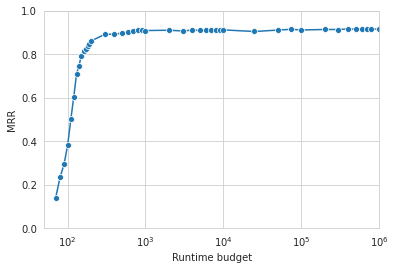

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.lineplot(x = budgets, y = mrrs, marker = 'o')
ax.set_ylabel("MRR")
ax.set_xlabel("Runtime budget")
ax.set_ylim(0, 1)
ax.set_xlim(50, 1000500)
ax.set_xscale("log")
plt.savefig("mrr_vs_budget.")

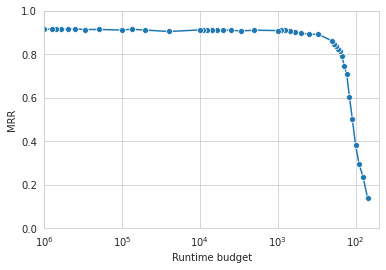

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.lineplot(x = budgets, y = mrrs, marker = 'o')
ax.set_ylabel("MRR")
ax.set_xlabel("Runtime budget")
ax.set_ylim(0, 1)
ax.set_xlim(1000500, 50)
ax.set_xscale("log")
plt.savefig('reversed_budget.png', dpi=300)

### Compare number of matches for each piece that differ in MRR

In [18]:
pieces = ['dAlkan,_Charles-Valentin3_Improvisations_dans_le_Style_brillant,_Op.12_22046', 'p101', 'p111', 'p175']

In [16]:
with open("data/v4.0_counts.pkl", "rb") as f:
    counts_v4 = pickle.load(f)

In [19]:
for piece in pieces:
    print(f"number of fingerprints from {piece} in DB: {counts_v4[mapping[piece]]}")

number of fingerprints from dAlkan,_Charles-Valentin3_Improvisations_dans_le_Style_brillant,_Op.12_22046 in DB: 20653
number of fingerprints from p101 in DB: 7501
number of fingerprints from p111 in DB: 5073
number of fingerprints from p175 in DB: 10376


In [12]:
with open("data/v3_counts.pkl", "rb") as f:
    counts_v3 = pickle.load(f)

In [20]:
for piece in pieces:
    print(f"number of fingerprints from {piece} in DB: {counts_v3[mapping[piece]]}")

number of fingerprints from dAlkan,_Charles-Valentin3_Improvisations_dans_le_Style_brillant,_Op.12_22046 in DB: 20430
number of fingerprints from p101 in DB: 6804
number of fingerprints from p111 in DB: 4472
number of fingerprints from p175 in DB: 9366


## Compare PDFs/matches for each fingerprint

In [3]:
with open("/data1/kji/v3_test_10mill.txt") as f1:
    words1 = set(f1.readlines())
with open("/data1/kji/construction_lists/100mill_v4.txt") as f2:
    words2 = set(f2.readlines())

In [24]:
fp_matches['045'][(32768, 8192, 9007834909917184)]

(1, 1)

In [25]:
reverse_mapping

{'0': '0',
 '1': '01',
 '2': '02',
 '3': '03',
 '4': '04',
 '5': '05',
 '6': '012',
 '7': '013',
 '8': '014',
 '9': '015',
 '10': '023',
 '11': '024',
 '12': '025',
 '13': '034',
 '14': '035',
 '15': '045'}

In [4]:
with open("/data1/kji/databases_random/probabilities.pkl", "rb") as f:
    utilities = pickle.load(f)

In [25]:
utilities

{'0': 0.6996407250330912,
 '01': 0.5351047270542615,
 '02': 0.4991734626405114,
 '03': 0.4723040987709249,
 '04': 0.4568764568764569,
 '05': 0.43351584442111835,
 '06': 0.42210824904730526,
 '012': 0.4359433546396297,
 '013': 0.4090706857238196,
 '014': 0.39065352318364366,
 '015': 0.37430849102102187,
 '016': 0.35950259304890975,
 '023': 0.40381513820143483,
 '024': 0.38896846125761786,
 '025': 0.3648330449090754,
 '026': 0.35434514770350417,
 '034': 0.38627236217597666,
 '035': 0.3661380464694034,
 '036': 0.34827082318558206,
 '045': 0.3700814207495248,
 '046': 0.35540528924672643,
 '056': 0.35520472192773844}

In [46]:
np.log2(100/30275) * utilities['0']

-5.7664270665626605

In [47]:
np.log2(1/30275) * utilities['035']

-5.450272135810593

In [36]:
np.log2(2/30275) * utilities['0']

-9.715098703159148

In [5]:
def utility(combination, pdfs):
    return utilities[combination] * np.log2(pdfs / 30275)

In [6]:
temp = set()
for line in words1:
    temp.add(' '.join(line.split()[:-1]) + '\n')

In [7]:
unique_to_v3 = temp.difference(words2)

In [8]:
unique_to_v4 = words2.difference(temp)

In [9]:
len(unique_to_v3)

33026658

In [10]:
db_dir = '/data1/kji/databases_v4'

In [11]:
fp_matches_file = f"{db_dir}/fp_matches.pkl"

In [12]:
with open(fp_matches_file, "rb") as f:
    fp_matches = pickle.load(f)

In [14]:
def initialize_entry(line):
    line = line.rstrip().split()
    n_gram, combination = ''.join(line[:-1]), line[-1]
    return ast.literal_eval(n_gram), reverse_mapping[combination]

In [15]:
combinations = []
for n_gram in range(1, 4):
    combinations += [[0] + list(tup) for tup in itertools.combinations(range(1, 6), n_gram-1)]

In [16]:
combinations = ["".join(str(num) for num in combination) for combination in combinations]

In [17]:
n_grams, types = [], []

In [18]:
reverse_mapping = {}

In [19]:
for i, c in enumerate(combinations):
    reverse_mapping[str(i)] = c

In [19]:
fp_matches['045'][(1125899906842624, 18014398510694400, 140737488355328)]

(4, 4)

In [20]:
reverse_mapping

{'0': '0',
 '1': '01',
 '2': '02',
 '3': '03',
 '4': '04',
 '5': '05',
 '6': '012',
 '7': '013',
 '8': '014',
 '9': '015',
 '10': '023',
 '11': '024',
 '12': '025',
 '13': '034',
 '14': '035',
 '15': '045'}

In [29]:
fp_matches['013'][(67108864, 140737756790784, 1099528404992)]

(2, 2)

In [23]:
utility('013', 2)

-5.6802898204473955

In [28]:
for line in unique_to_v4:
    n_gram, combination = initialize_entry(line)
    matches, pdfs = fp_matches[combination][n_gram]
    if matches > 1:
        print(line)
        print(n_gram)
        print(combination)

(67108864, 140737756790784, 1099528404992) 7

(67108864, 140737756790784, 1099528404992)
013
(36169534507450368, 9077567999442944) 2

(36169534507450368, 9077567999442944)
02
(274880004096, 81920) 2

(274880004096, 81920)
02
(8650752, 893357522944) 4

(8650752, 893357522944)
04
(37383412645888, 290271078252544) 4

(37383412645888, 290271078252544)
04
(4947819102208, 33554432, 2473903259648) 8

(4947819102208, 33554432, 2473903259648)
014
(140737488355328, 272891904) 2

(140737488355328, 272891904)
02
(1198468282449920, 1165483667619840) 5

(1198468282449920, 1165483667619840)
05
(18577348462903296, 9007199271518208) 5

(18577348462903296, 9007199271518208)
05
(285212672, 537395200) 2

(285212672, 537395200)
02
(274949210112, 2199576903680) 5

(274949210112, 2199576903680)
05
(141837069189120, 18155135997837312) 3

(141837069189120, 18155135997837312)
03
(72057594177388544, 18014398509481984) 3

(72057594177388544, 18014398509481984)
03
(140737488363520, 1136895023120384) 1

(1407374883


(2748795846656, 2748780118016, 140737488355328)
034
(2269391999729664, 270532608, 177209344) 10

(2269391999729664, 270532608, 177209344)
023
(8796093358080, 327680) 2

(8796093358080, 327680)
02
(17592207015936, 17592188665856) 4

(17592207015936, 17592188665856)
04
(1099545182208, 81920) 4

(1099545182208, 81920)
04
(65536, 512, 1460288881664) 15

(65536, 512, 1460288881664)
045
(4947953319936, 1408749535232) 5

(4947953319936, 1408749535232)
05
(567348004126720, 1408766050304, 4194304) 11

(567348004126720, 1408766050304, 4194304)
024
(2392537337954304, 4398046511104, 1374423089152) 10

(2392537337954304, 4398046511104, 1374423089152)
023
(1125899906842624, 4503599627640832) 3

(1125899906842624, 4503599627640832)
03
(137439117312, 16384) 2

(137439117312, 16384)
02
(140738025226240, 2251799813685248, 8796244017152) 7

(140738025226240, 2251799813685248, 8796244017152)
013
(2199028629504, 137481158656) 4

(2199028629504, 137481158656)
04
(18688, 2199023255552, 343597383680) 10

(18

023
(2392537303089152, 4398046511104, 137438953472) 10

(2392537303089152, 4398046511104, 137438953472)
023
(4503599635824640, 16777216) 2

(4503599635824640, 16777216)
02
(8796093022208, 2251799813685248, 1125899906875392) 10

(8796093022208, 2251799813685248, 1125899906875392)
023
(70368744177664, 3109556343424) 3

(70368744177664, 3109556343424)
03
(2199631429632, 549839699968) 2

(2199631429632, 549839699968)
02
(16777216, 2269392008118272, 23364756307968) 7

(16777216, 2269392008118272, 23364756307968)
013
(140737664516096, 2251799834656768, 4398222671872) 7

(140737664516096, 2251799834656768, 4398222671872)
013
(10995116539904, 17592186175488) 2

(10995116539904, 17592186175488)
02
(2475050401792, 140737488355328) 3

(2475050401792, 140737488355328)
03
(35184372105216, 4096, 5841155538944) 7

(35184372105216, 4096, 5841155538944)
013
(106652627959808, 16777216) 2

(106652627959808, 16777216)
02
(17592190369792, 140737493598208) 5

(17592190369792, 140737493598208)
05
(2748865576

02
(13194139533312, 2199040032768) 4

(13194139533312, 2199040032768)
04
(171807080448, 687198994432, 1374389534720) 10

(171807080448, 687198994432, 1374389534720)
023
(8388608, 2508266143744) 3

(8388608, 2508266143744)
03
(274877972480, 281543696318464) 4

(274877972480, 281543696318464)
04
(1168231104512, 52776558133248) 2

(1168231104512, 52776558133248)
02
(9007199321849856, 35184380477440) 2

(9007199321849856, 35184380477440)
02
(283742753128448, 8796095643648) 2

(283742753128448, 8796095643648)
02
(687203221504, 316659352993792, 2621440) 13

(687203221504, 316659352993792, 2621440)
034
(2251799847239680, 2748854566912, 4398046511104) 10

(2251799847239680, 2748854566912, 4398046511104)
023
(140771852288000, 70506184179712, 262144) 6

(140771852288000, 70506184179712, 262144)
012
(140737488355328, 33554432, 4398080065536) 6

(140737488355328, 33554432, 4398080065536)
012
(35184372121600, 567347999997952, 32768) 10

(35184372121600, 567347999997952, 32768)
023
(2199040032768, 1


(1134697242427392,)
0
(10170486751232, 10170482622464) 2

(10170486751232, 10170482622464)
02
(18966575841280, 283674000031744, 131072) 10

(18966575841280, 283674000031744, 131072)
023
(4541532850880512, 131072, 524288) 10

(4541532850880512, 131072, 524288)
023
(9077568134184960, 36028797560029184) 5

(9077568134184960, 36028797560029184)
05
(5635040083968, 92359144505344, 92359144505344) 13

(5635040083968, 92359144505344, 92359144505344)
034
(1236984201216, 262144) 1

(1236984201216, 262144)
01
(567348000980992, 2097152, 9077568074416128) 10

(567348000980992, 2097152, 9077568074416128)
023
(35184389521408, 549755813888, 4398046511104) 6

(35184389521408, 549755813888, 4398046511104)
012
(72621643544920064, 268435456, 33554432) 6

(72621643544920064, 268435456, 33554432)
012
(10170482556928, 21990366773248) 1

(10170482556928, 21990366773248)
01
(35184372613120, 262144, 137439477760) 6

(35184372613120, 262144, 137439477760)
012
(79714593013760, 68719476736, 67108864) 6

(79714593

013
(35184372088832, 1125899906842624, 35184439197696) 6

(35184372088832, 1125899906842624, 35184439197696)
012
(4466776539136, 567347999965184) 5

(4466776539136, 567347999965184)
05
(8388608, 18141984325632) 1

(8388608, 18141984325632)
01
(17039360, 1099511644160) 3

(17039360, 1099511644160)
03
(17592186044416, 2748795846656, 2748812623872) 6

(17592186044416, 2748795846656, 2748812623872)
012
(37888, 37888, 37888) 7

(37888, 37888, 37888)
013
(1099520016384, 17301504, 1099520016384) 7

(1099520016384, 17301504, 1099520016384)
013
(5497558138880, 17592219598848, 70368811286528) 7

(5497558138880, 17592219598848, 70368811286528)
013
(549755813888, 68736253952, 137455730688) 6

(549755813888, 68736253952, 137455730688)
012
(137439019008, 140737488355328) 1

(137439019008, 140737488355328)
01
(11544955977728, 2817499201536, 4456448) 14

(11544955977728, 2817499201536, 4456448)
035
(4741644156928, 2252899325575168) 1

(4741644156928, 2252899325575168)
01
(2568459162484736, 14411518807

(549757124608, 1310720, 1310720)
015
(36310271995936768, 2920578809856) 3

(36310271995936768, 2920578809856)
03
(2269392005103616, 2097152) 5

(2269392005103616, 2097152)
05
(180149482652958720, 360287970189639680) 3

(180149482652958720, 360287970189639680)
03
(8388608, 262144, 1168231235584) 7

(8388608, 262144, 1168231235584)
013
(4521191824228352, 18084767253663744) 3

(4521191824228352, 18084767253663744)
03
(274882363392, 68736778240) 5

(274882363392, 68736778240)
05
(602532407672832, 4672960069632) 4

(602532407672832, 4672960069632)
04
(39582460542976, 1116959932416, 1099782160384) 7

(39582460542976, 1116959932416, 1099782160384)
013
(70368744194048, 281474981429248) 5

(70368744194048, 281474981429248)
05
(2269391999991808, 1134696000389120, 1134696000389120) 7

(2269391999991808, 1134696000389120, 1134696000389120)
013
(562949970329600, 562949957648384, 1125899906842624) 10

(562949970329600, 562949957648384, 1125899906842624)
023
(282024771321856, 16777216) 2

(2820247713

KeyboardInterrupt: 

In [9]:
n_cores = 30
pool = multiprocessing.Pool(n_cores)
pairs = pool.map(initialize_entry, list(unique_to_v4))

In [11]:
for pair in pairs:
    matches, pdfs = fp_matches[pairs[1]][pairs[0]]
    if num_matches > 1:
        print(pairs[0])
        print(pairs[1])
        break
#     num_matches.append(matches)
#     num_pdfs.append(pdfs)

NameError: name 'fp_matches' is not defined

In [21]:
max(num_matches)

763

In [22]:
max(num_pdfs)

129